In [2]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

# 腐蚀,膨胀,开,闭

腐蚀和膨胀是对白色部分（高亮部分）而言的，不是黑色部分。

膨胀就是图像中的高亮部分进行膨胀，“领域扩张”，效果图拥有比原图更大的高亮区域。

腐蚀就是原图中的高亮部分被腐蚀，“领域被蚕食”，效果图拥有比原图更小的高亮区域。

开操作 - open - 减少像素 - 断开 先腐蚀后膨胀,可以去掉小的高亮点,让高亮更少

闭操作 - close - 增加像素 - 连接 先膨胀后腐蚀,去掉小黑点,让高亮更多

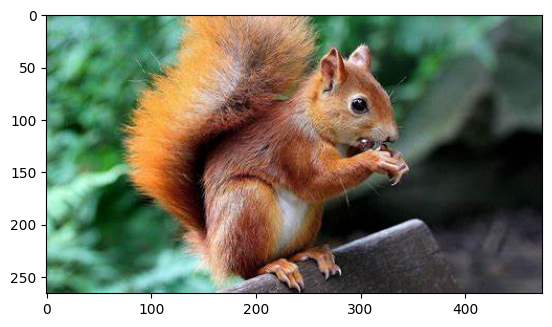

In [3]:
image = cv2.imread("../images/squirrel.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

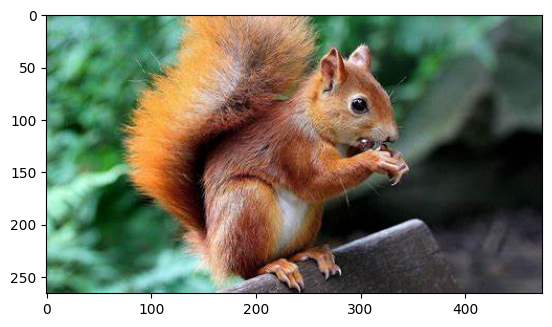

In [4]:
image1 = skimage.io.imread("../images/squirrel.jpg")
plt.imshow(image1)

# 腐蚀

## cv2.erode

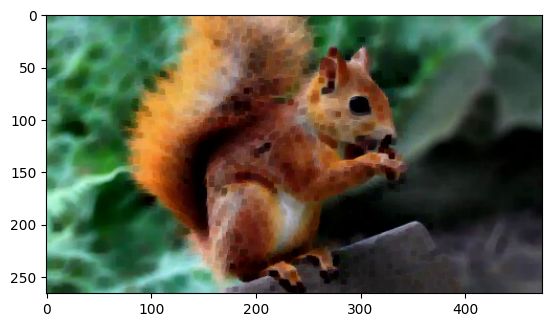

In [5]:
image_erode = cv2.erode(
    src=image,
    kernel=np.ones((5, 5)),
    iterations=1,           # 迭代次数
)
plt.imshow(image_erode)

## morphology.dilation

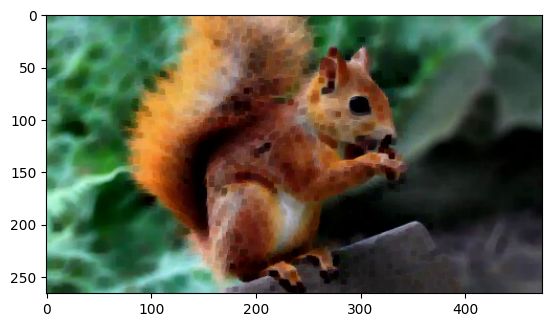

In [6]:
image1_erosion = skimage.morphology.erosion(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_erosion)

# 膨胀

## cv2.dilate

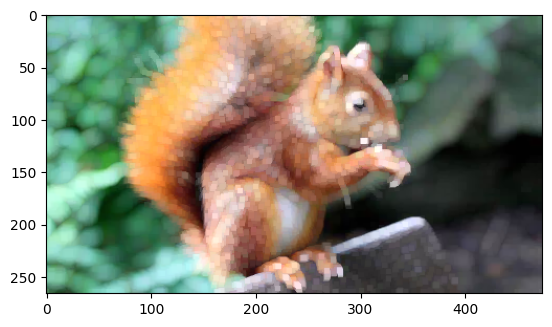

In [7]:
image_dilate = cv2.dilate(
    src=image,
    kernel=np.ones((5, 5)),
    iterations=1,           # 迭代次数
)
plt.imshow(image_dilate)

## morphology.dilation

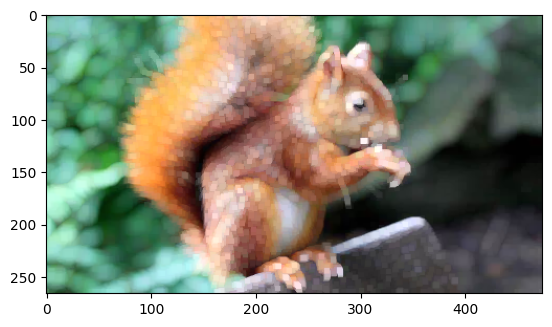

In [8]:
image1_dilation = skimage.morphology.dilation(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_dilation)

# 开

## cv2.MORPH_OPEN

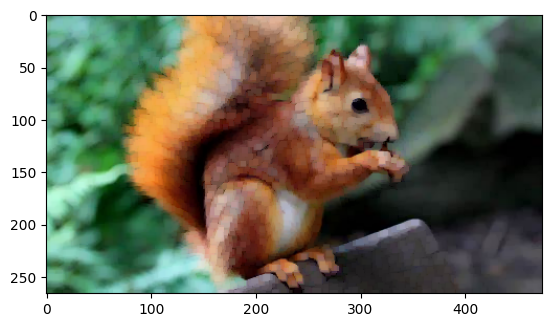

In [9]:
image_morphology_open = cv2.morphologyEx(
    src=image,
    op=cv2.MORPH_OPEN,
    kernel=np.ones((5, 5)),
    iterations=1,
)
plt.imshow(image_morphology_open)

## morphology.opening

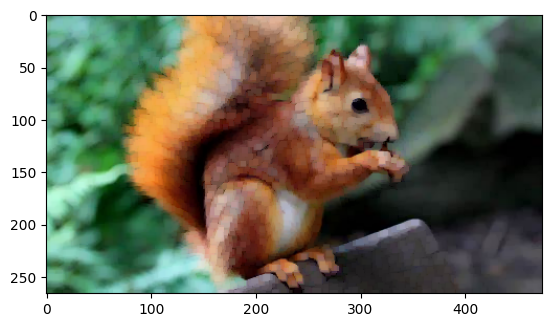

In [10]:
image1_opening = skimage.morphology.opening(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_opening)

# 闭

## cv2.MORPH_CLOSE

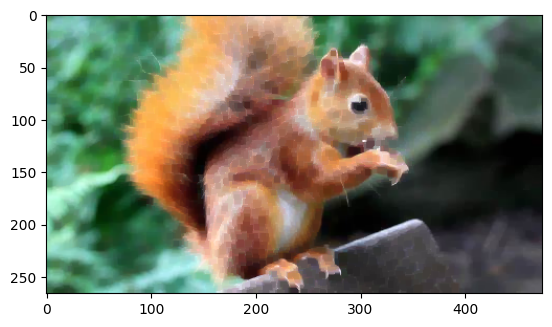

In [11]:
image_morphology_close = cv2.morphologyEx(
    src=image,
    op=cv2.MORPH_CLOSE,
    kernel=np.ones((5, 5)),
    iterations=1,
)
plt.imshow(image_morphology_close)

## morphology.closing

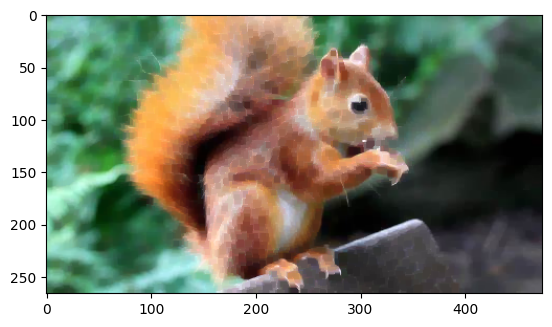

In [12]:
image1_closing = skimage.morphology.closing(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_closing)

#  top hat - 顶帽 – 可以看到小的亮点部分

顶帽 是原图像与开操作之间的差值图像

开操作: 先腐蚀后膨胀,可以去掉小的高亮点,让高亮更少

## cv2.MORPH_TOPHAT

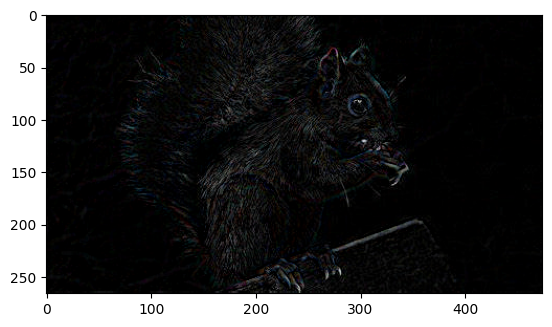

In [13]:
image_morphology_tophat = cv2.morphologyEx(
    src=image,
    op=cv2.MORPH_TOPHAT,
    kernel=np.ones((5, 5)),
    iterations=1,
)
plt.imshow(image_morphology_tophat)

## morphology.white_tophat

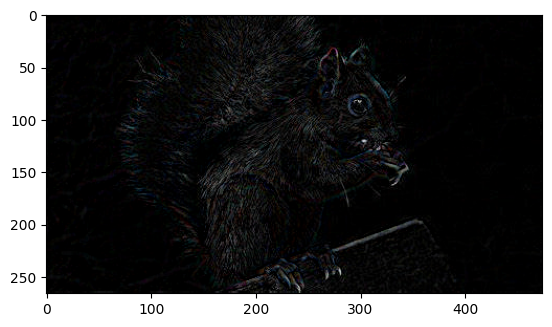

In [14]:
image1_white_tophat = skimage.morphology.white_tophat(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_white_tophat)

#  black hat - 黑帽 - 可以看到小的黑点部分

黑帽 黑帽是闭操作图像与源图像的差值图像

闭操作: 先膨胀后腐蚀,去掉小黑点,让高亮更多

## cv2.MORPH_BLACKHAT

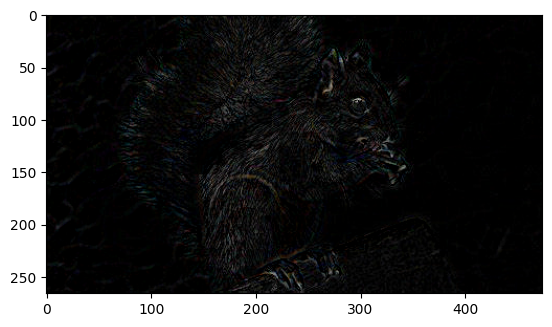

In [15]:
image_morphology_blackhat = cv2.morphologyEx(
    src=image,
    op=cv2.MORPH_BLACKHAT,
    kernel=np.ones((5, 5)),
    iterations=1,
)
plt.imshow(image_morphology_blackhat)

## morphology.black_tophat

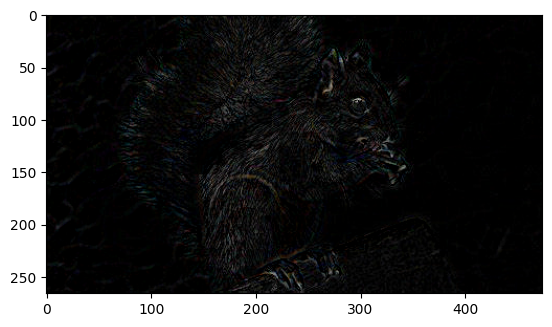

In [16]:
image1_black_tophat = skimage.morphology.black_tophat(
    image=image1,
    footprint=np.ones((5, 5, 1))    # 三维的,因为图片是三维的
)
plt.imshow(image1_black_tophat)

# Gradient 膨胀减去腐蚀,又称为基本梯度（其它还包括-内部梯度、方向梯度）

膨胀减去腐蚀,又称为基本梯度（其它还包括-内部梯度、方向梯度）

可以看到明暗边缘


## cv2.MORPH_GRADIENT

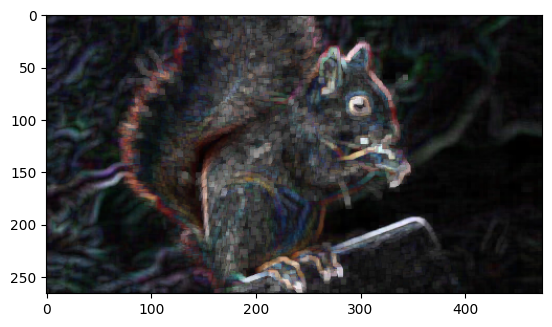

In [17]:
image_morphology_gradient = cv2.morphologyEx(
    src=image,
    op=cv2.MORPH_GRADIENT,
    kernel=np.ones((5, 5)),
    iterations=1,
)
plt.imshow(image_morphology_gradient)